In [2]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#设置中文编码和负号的正常显示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False


In [3]:
# 读取数据
# 1、数据读入*********************************************************************************
ratings_df = pd.read_csv("./studiodata/ratings.dat",sep='::',engine='python', names=['user_id','studio_id','rating','ts'])

# 1::1193::5::978300760
# 用户,直播间id,评分，时间
studio_df = pd.read_csv("studiodata/studio_info.dat",sep='::', engine='python', names=['studio_id','title','genres'])

# 1::Toy Story (1995)::Animation|Children's|Comedy
# 直播间id,影片名称，类型
user_df = pd.read_csv('studiodata/user_info.dat', sep='::', engine='python', names=['user_id','sex','age','regionName','zipCode'])
# 1::F::1::10::48067
# 用户id,性别,年龄,区域,邮编

ratings_df.info()
user_df.info()
ratings_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    276 non-null    int64
 1   studio_id  276 non-null    int64
 2   rating     276 non-null    int64
 3   ts         276 non-null    int64
dtypes: int64(4)
memory usage: 8.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   sex         6040 non-null   object
 2   age         6040 non-null   int64 
 3   regionName  6040 non-null   int64 
 4   zipCode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


user_id    studio_id      rating            ts
count  276.000000   276.000000  276.000000  2.760000e+02
mean    33.264493  2009.275362    3.648551  9.783315e+08
std      0.441864  1083.470705    1.046048  3.426692e+05
min     33.000000     1.000000    1.000000  9.781029e+08
25%     33.000000  1129.250000    3.000000  9.781046e+08
50%     33.000000  2032.000000    4.000000  9.781098e+08
75%     34.000000  2941.750000    4.000000  9.785584e+08
max     34.000000  3911.000000    5.000000  9.789857e+08

In [4]:
# 用户年龄探索
# user_df.loc[(user_df['age'] < 18), 'age_range'] = 1
# user_df.loc[((user_df['age'] >= 18) & (user_df['age'] < 24)), 'age_range'] = 2
# user_df.loc[((user_df['age'] >= 25) & (user_df['age'] < 34)), 'age_range'] = 3
# user_df.loc[((user_df['age'] >= 35) & (user_df['age'] < 44)), 'age_range'] = 4
# user_df.loc[((user_df['age'] >= 45) & (user_df['age'] < 60)), 'age_range'] = 5
# user_df.loc[(user_df['age'] >= 60), 'age_range'] = 6

# user_df
bins = [0, 17, 24, 34, 44, 60,np.inf]  # 定义年龄范围分隔值
labels = [1, 2, 3, 4, 5, 6]  # 定义新年龄段字段标签
user_df['age_range'] = pd.cut(user_df['age'], bins=bins, labels=labels)
user_df


user_id sex  age  regionName zipCode age_range
0           1   F    1          10   48067         1
1           2   M   56          16   70072         5
2           3   M   25          15   55117         3
3           4   M   45           7   02460         5
4           5   M   25          20   55455         3
...       ...  ..  ...         ...     ...       ...
6035     6036   F   25          15   32603         3
6036     6037   F   45           1   76006         5
6037     6038   F   56           1   14706         5
6038     6039   F   45           0   01060         5
6039     6040   M   25           6   11106         3

[6040 rows x 6 columns]

Text(0.5, 1.0, 'people age range')

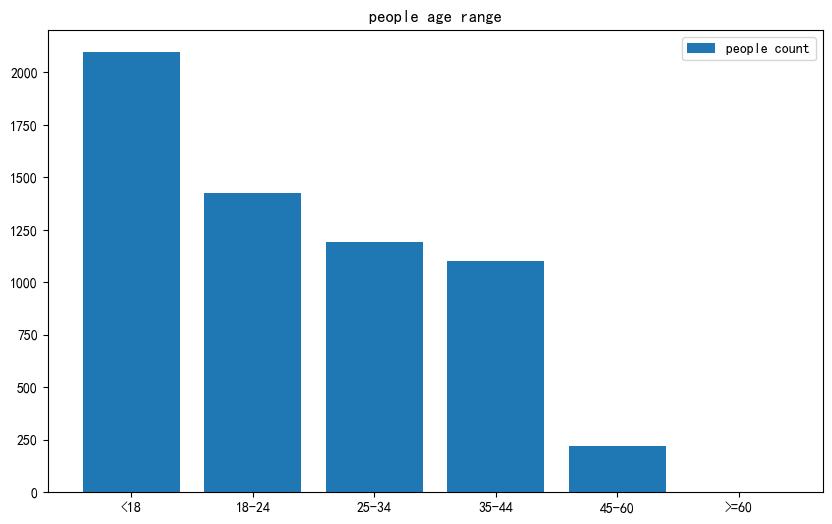

In [8]:
fig = plt.figure(figsize= (10, 6))
x = np.array(["<18","18-24","25-34","35-44","45-60",">=60"])
y = user_df['age_range'].value_counts() # TODO 这个分组计数，不考虑年龄段人数为0的统计情况
plt.bar(x, y, label='people count')
plt.legend()
plt.title('people age range')

Text(0.5, 1.0, 'people sex range')

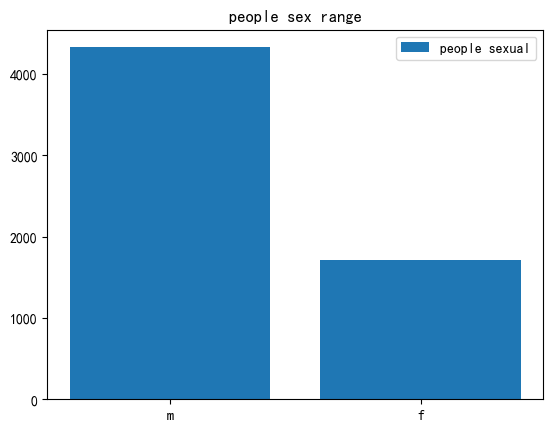

In [9]:
#2、按照性别探索
# 2、按照性别探索
x = np.array(["m","f"])
y = user_df['sex'].value_counts()
plt.bar(x, y,  label='people sexual')
plt.legend()
plt.title('people sex range')

In [10]:
# 使用热力图绘制样本特征相关性
studio_merge_df = studio_df.merge(ratings_df, on='studio_id')


# 计算每个电影的打分平均
studio_avgration_df = studio_merge_df.groupby('title')['rating'].mean().sort_values(ascending=False)
studio_avgration_df =studio_avgration_df.reset_index().rename(columns={'rating':'AvgRating'})


# 计算每个电影的打分次数
studio_count_df = studio_merge_df.groupby('title')['rating'].count().sort_values(ascending=False).reset_index().rename(columns={'rating':'CountRating'})


In [11]:
studio_merge_df = studio_merge_df.merge(studio_avgration_df, on='title', how='left')
studio_merge_df = studio_merge_df.merge(studio_count_df, on='title', how='left')
studio_merge_df


studio_id                                              title  \
0            1                                   Toy Story (1995)   
1            7                                     Sabrina (1995)   
2           11                     American President, The (1995)   
3           17                       Sense and Sensibility (1995)   
4           32                              Twelve Monkeys (1995)   
..         ...                                                ...   
271       3827                               Space Cowboys (2000)   
272       3836                              Kelly's Heroes (1970)   
273       3844                             Steel Magnolias (1989)   
274       3868  Naked Gun: From the Files of Police Squad!, Th...   
275       3911                                Best in Show (2000)   

                          genres  user_id  rating         ts  AvgRating  \
0    Animation|Children's|Comedy       34       5  978102970        5.0   
1                 Comedy|Romance       34       3  978104490        3.0   
2           Comedy|Drama|Romance       34       4  978103264        4.0   
3                  Drama|Romance       34       5  978104339        5.0   
4                   Drama|Sci-Fi       33       2  978109568        2.0   
..                           ...      ...     ...        ...        ...   
271                Action|Sci-Fi       33       4  978110486        4.0   
272            Action|Comedy|War       33       4  978983205        4.0   
273                        Drama       33       5  978110149        5.0   
274                       Comedy       34       4  978104050        4.0   
275                       Comedy       33       2  978108939        2.0   

     CountRating  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
271            1  
272            1  
273            1  
274            1  
275            1  

[276 rows x 8 columns]

In [13]:
colnm = studio_merge_df.columns.tolist()

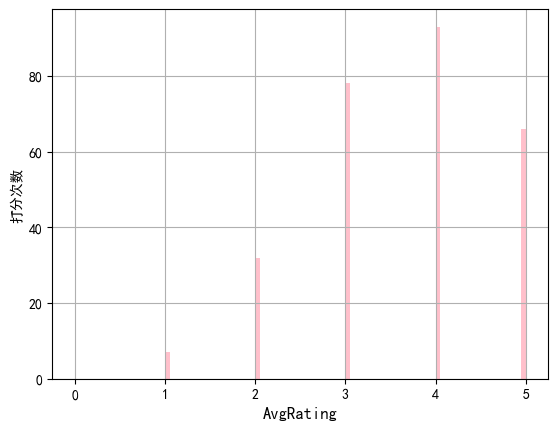

In [14]:
# 电影观影评分分 和 打分次数直方图
studio_merge_df[colnm[6]].hist(range=[0,5],bins = 100,color = 'pink')
plt.xlabel(colnm[6],fontsize = 12)
plt.ylabel('打分次数')
plt.show()



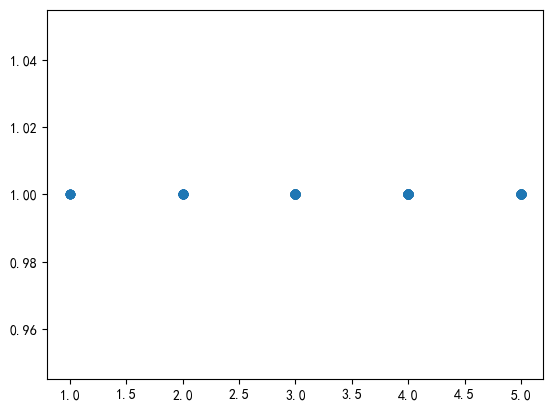

In [48]:
plt.scatter(studio_merge_df['AvgRating'], studio_merge_df['CountRating'])
plt.show()


In [15]:
studio_merge_df = studio_merge_df.merge(user_df, on='user_id', how='left')
studio_merge_df


studio_id                                              title  \
0            1                                   Toy Story (1995)   
1            7                                     Sabrina (1995)   
2           11                     American President, The (1995)   
3           17                       Sense and Sensibility (1995)   
4           32                              Twelve Monkeys (1995)   
..         ...                                                ...   
271       3827                               Space Cowboys (2000)   
272       3836                              Kelly's Heroes (1970)   
273       3844                             Steel Magnolias (1989)   
274       3868  Naked Gun: From the Files of Police Squad!, Th...   
275       3911                                Best in Show (2000)   

                          genres  user_id  rating         ts  AvgRating  \
0    Animation|Children's|Comedy       34       5  978102970        5.0   
1                 Comedy|Romance       34       3  978104490        3.0   
2           Comedy|Drama|Romance       34       4  978103264        4.0   
3                  Drama|Romance       34       5  978104339        5.0   
4                   Drama|Sci-Fi       33       2  978109568        2.0   
..                           ...      ...     ...        ...        ...   
271                Action|Sci-Fi       33       4  978110486        4.0   
272            Action|Comedy|War       33       4  978983205        4.0   
273                        Drama       33       5  978110149        5.0   
274                       Comedy       34       4  978104050        4.0   
275                       Comedy       33       2  978108939        2.0   

     CountRating sex  age  regionName zipCode age_range  
0              1   F   18           0   02135         2  
1              1   F   18           0   02135         2  
2              1   F   18           0   02135         2  
3              1   F   18           0   02135         2  
4              1   M   45           3   55421         5  
..           ...  ..  ...         ...     ...       ...  
271            1   M   45           3   55421         5  
272            1   M   45           3   55421         5  
273            1   M   45           3   55421         5  
274            1   F   18           0   02135         2  
275            1   M   45           3   55421         5  

[276 rows x 13 columns]

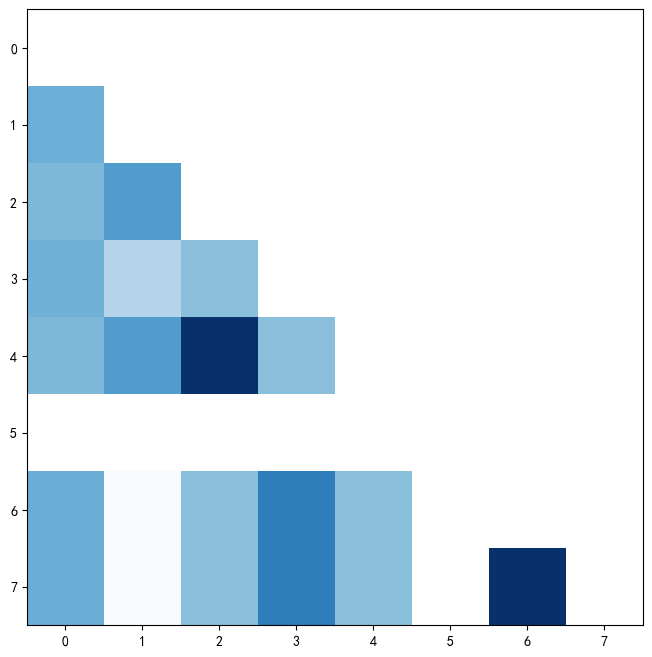

In [51]:
col = studio_merge_df.columns
col
plt.figure(figsize = (10,8))
# 取2-13列列名
colnm = studio_merge_df.columns.tolist()[0:13]
# 计算列与列之间的相关性矩阵
mcorr = studio_merge_df[colnm].corr()
# 生成与列相关性矩阵行列数一样的全0矩阵
# np.ones_like(mcorr, dtype=np.bool_)
mask = np.triu(np.ones_like(mcorr, dtype=np.bool_))
mcorr[mask] = np.nan
# 将上三角矩阵设置为1
plt.imshow(mcorr,cmap='Blues')
# 可以看到有一些绝对值大的相关性列

In [17]:
# 使用pivot_table将数据重塑为适合热力图的格式
pivot_data = studio_merge_df.pivot_table(index='age', columns='rating', values='age_range', aggfunc='sum')
pivot_data
# 绘制热力图
# plt.figure(figsize=(10, 8))  # 设置图形大小
# sns.heatmap(pivot_data, annot=True, fmt='d')  # annot=True显示数值，fmt='d'确保数值以整数形式显示
# plt.xlabel('Rating')  # 设置x轴标签
# plt.ylabel('Age Group')  # 设置y轴标签
# plt.title('Heatmap of Movie Ratings vs. Age Group')  # 设置标题
# plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19908\1875295216.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  pivot_data = studio_merge_df.pivot_table(index='age', columns='rating', values='age_range', aggfunc='sum')


Empty DataFrame
Columns: []
Index: [18, 45]

TypeError: Invalid shape (276,) for image data

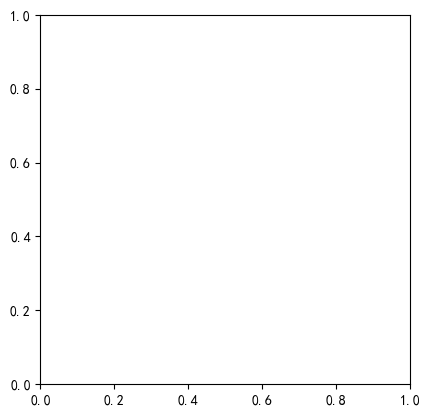

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 假设你的DataFrame是这样的（这里是一个简化的例子）

# 将数据转换为适合热力图的格式
age_groups = studio_merge_df['age']
ratings = studio_merge_df['rating']
rating_counts = np.array(studio_merge_df['age_range'])

# 绘制热力图
fig, ax = plt.subplots()
cax = ax.imshow(rating_counts, cmap='viridis', interpolation='nearest')

# 添加年龄组和评分的标签
ax.set_xticks(np.arange(len(ratings)))
ax.set_xticklabels(ratings)
ax.set_yticks(np.arange(len(age_groups)))
ax.set_yticklabels(age_groups)

# 旋转x轴的标签以便阅读
plt.xticks(rotation=45)

# 添加颜色条
fig.colorbar(cax)

# 设置标题和坐标轴标签
plt.title('Heatmap of Movie Ratings vs. Age Group')
plt.xlabel('Rating')
plt.ylabel('Age Group')
# 显示图形
plt.show()
